# Warsztat 7 – NumPy - wprowadzenie<a id=top></a>

<font size=2>Przed pracą z notatnikiem polecam wykonać kod w ostatniej komórce (zawiera html i css), dzięki czemu całość będzie bardziej estetyczna :)</font>

<a href='#Warsztat-1---podstawy-programowania'>Warsztat 7</a>
<ul>
<li><a href='#Czym-jest-NumPy'><span>Czym jest NumPy</span></a></li>
<li><a href='#Tablica'><span>Tablica</span></a></li>
<li><a href='#Inne-metody-tworzenia-tablic'><span>Inne metody tworzenia tablic</span></a></li>
<li><a href='#Liczby-losowe'><span>Liczby losowe</span></a></li>
<li><a href='#Typy-danych'><span>Typy danych</span></a></li>
<li><a href='#Slicing'><span>Slicing</span></a></li>
<li><a href='#Widoki-i-kopiowanie'><span>Widoki i kopiowanie</span></a></li>
</ul>

## Czym jest NumPy

<img src="http://bids.berkeley.edu/sites/default/files/styles/400x225/public/projects/numpy_project_page.jpg?itok=flrdydei" width=15% height=15%>

NumPy to jeden z modułów zawartych w pakieie SciPy (ang. scientific Python), który jest zbiorem narzędzi dedykowanych pracy naukowej oraz bardziej rozbudowanym obliczeniom. Sam NumPy ma służyć pracy z danymi numerycznymi, która nie jest możliwa przy użyciu standardowego Pythona.<br>

Żeby rozpocząć pracę należy zaimportować NumPy podobnie jak inne biblioteki. Zwyczajowo przypisuje się jej skrót np, ale oczywiście możecie wybrać dowolny sposób dołączenia modułu do bieżącej pracy.

In [4]:
import numpy as np

NumPy rozszerza możliwości Pythona w dwóch podstawowych spektach:<br>
1. oddaje do użytku dwie nowe struktury danych - tablicę (ang. array) oraz macierz (ang. matrix), które w istotny sposób zwiększają możliwość tworzenia danych numerycznych oraz ułatwiają pracę z nimi;<br>
2. wprowadza szereg funkcji przydatnych do obliczeń (np. stałe matematyczne, ważne operacje matematyczne czy przekształcenia).

Do tego większość biblioteki napisana jest w języku C, dzięki czemu operacje w NumPy wykonywane są dużo szybciej niż w przypadku kodu w czystym Pythonie (co będzie miało ogromne znaczenie w przypadku dużych danych czy skomplikowanych operacji numerycznych).<br>
Możemy to zobaczyć za pomocą poniższego prostego testu wydajności.

In [2]:
x = range(10000)
%timeit [i**2 for i in x]

100 loops, best of 3: 3.82 ms per loop


In [5]:
x = np.arange(10000)
%timeit x**2

The slowest run took 5.26 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.69 µs per loop


<a href='#top' style='float: right; font-size: 13px;'>Do początku</a>  

## Tablica

Tablica może być rozumiana jako wielowymiarowa lista.<br>
Tworzymy ją za pomocą funkcji <b>array( )</b> a wewnątrz umieszczamy listę obiektów, które mają się znaleźć w tablicy.

In [57]:
x = range(16)
print(type(x), x)
tablica = np.array(x)
print(type(tablica), tablica)

<type 'list'> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
<type 'numpy.ndarray'> [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


Charakterystycznym parametrem tablicy są jej wymiary. NumPy pozwala tworzyć dane o dowolnych rozmiarach, ale co wazniejsze, również o dowolnej liczbie wymiarów (wymiary naszej tablicy sprawdzamy metodą <b>.ndim</b>).<br>
1 wymiar - tablica stworzona z pojedynczej listy (nawet pustej)<br>
2 wymiar - tablica złożona z co najmniej dwóch list o takiej samej długości<br>
3 wymiar - tablica złożona z co najmniej dwóch tablic 2-wymiarowych<br>
...

In [240]:
x = np.array([])
y = np.array([1,2,3,4])
z = np.array([[1,2,3,4],[2,2,2,2]])
v = np.array([[[1,2,3,4],[2,2,2,2]],[[1,2,3,4],[2,2,2,2]]])
print ('x = ', x, '\n')
print ('y = ', y, '\n')
print ('z = ', z, '\n')
print ('v = ', v, '\n')
print ("Wymiar x = ",x.ndim,", y = ", y.ndim,", z = ", z.ndim,", v = ", v.ndim)

x =  [] 

y =  [1 2 3 4] 

z =  [[1 2 3 4]
 [2 2 2 2]] 

v =  [[[1 2 3 4]
  [2 2 2 2]]

 [[1 2 3 4]
  [2 2 2 2]]] 

Wymiar x =  1 , y =  1 , z =  2 , v =  3


#### 1-D

In [237]:
tablica = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
print (tablica)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [85]:
print (tablica.ndim) #zwraca wymiar tablicy

print (tablica.shape) #zwraca długość poszczególnych wymiarów tablicy

print (len(tablica)) #zwraca długość pierwszego wymiaru tablicy

1
(15L,)
15


Jak widać powyżej, jednowymiarowa tablica wygląda bardzo podobnie do zwykłej listy - różni ją tylko brak przecinków.<br>
Żeby stworzyć tablice o wyższych wymiarach, mamy do wyboru dwie główne strategie.

#### 2-D

Możemy do funkcji **array** przekazać zamiast listy elementów, listę list o równej ilości elementów. Wtedy NumPy intuicyjnie utworzy dwuwymiarową tablicę, której poszczególne wiersze będą przekazywanymi listami.

In [87]:
tablica2d = np.array([[0,1,2,3,4,5,6,7],[8,9,10,11,12,13,14,15]])
print (tablica2d)

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]]


In [88]:
print (tablica2d.ndim)

print (tablica2d.shape)

print (len(tablica2d))

2
(2L, 8L)
2


Możemy również podać dane w postaci jednej długiej listy a następnie "uformować" ją we właściwy kształt za pomocą polecenia <b>.shape( )</b>.<br> Należy jednak pamiętać, że operacja ta uda się tylko wtedy, kiedy nie będzie trzeba zmieniać ilości elementów tablicy.

In [60]:
tablica.shape = (4,4)
print (tablica)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


Podobny efekt możemy uzyskać za pomocą metody <b>.reshape(</b>wartości wymiarów<b>)</b>. Tutaj również trzeba zachować liczbę elementów tablicy.<br>
Tymi metodami możemy uzyskać dowolny wymiar naszej tablicy, o ile będziemy mieli dość danych.<br><br>
**Ważne:** kolejność podawania argumentów do metody shape() i reshape() jest nieintuicyjna - w poniższym przykładzie przekazujemy (2,4,2,1) tworząc 4-wymiarową tablicę. Jednak jak widać, przy n wymiarach kolejność jest następująca: (n, n-1, n-2,..., rząd, kolumna).

In [239]:
tablica.reshape(2,4,2,1)

array([[[[ 0],
         [ 1]],

        [[ 2],
         [ 3]],

        [[ 4],
         [ 5]],

        [[ 6],
         [ 7]]],


       [[[ 8],
         [ 9]],

        [[10],
         [11]],

        [[12],
         [13]],

        [[14],
         [15]]]])

<a href='#top' style='float: right; font-size: 13px;'>Do początku</a>  

#### Ćwiczenie

Stwórz tablicę złożoną z 12 dowolnych elementów. Uformuj trzy wersje o wskazanych wymiarach: 6x2, 3x4 oraz 2x2x3.<br>
Wykorzystaj komendy **shape**, **ndim** oraz **len**, żeby sprawdzić efekt każdej zmiany.

### Inne metody tworzenia tablic

Wprowadzanie ręcznie danych do tablicy rzadko kiedy jest pożądaną i sensowną czynnością. Zamiast tego, możemy wspomóc się różnymi funkcjami w celu wygenerowania tablic o interesującym nas kształcie czy zawartości. Poniżej przyjrzymy się kilku przykładom.

Jedną z opcji może być funkcja <b>arange( )</b>, czyli numpy'owy odpowiednik standardowego **range( )**.

In [90]:
tablica_ar = np.arange(100)
tablica_ar.shape = (10,10)
tablica_ar

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

Kolejną opcją jest funkcja <b>linspace( )</b>, która tworzy nam listę równooddalonych od siebie punktów we wskazanym zakresie. Składnia tej funkcji wygląda następująco:
<center>**linspace(** początek, koniec, ilość punktów **)**</center>

In [95]:
tablica_ls = np.linspace(1,5,11)
tablica_ls

array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ])

Dodanie do atrybutów **endpoint = False** sprawi, że górna granica ciągu nie będzie elementem tablicy.

In [97]:
tablica_ls = np.linspace(1,5,10, endpoint = False)
tablica_ls

array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6])

Istnieje też kilka funkcji tworzących tablice uniformiczne - np. o wszystkich elementach równych sobie.

In [99]:
tablica_zer = np.zeros((5,5))
tablica_zer

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [100]:
tablica_jedynek = np.ones((3,3,3))
tablica_jedynek

array([[[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]]])

In [103]:
tablica_ein = np.eye(4)
tablica_ein

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [111]:
tablica_prze = np.diag(np.array([1,2,3,4]))
tablica_prze

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

### Liczby losowe

Możemy też wykorzystać funkcje generujące liczby losowe. NumPy ma wbudowane porządne algorytmy generowania liczb pseudo-losowych, dzięki czemu mogą być one wykorzystywane w obliczeniach naukowych.

In [198]:
np.random.random(10)

array([ 0.86992419,  0.77468011,  0.43447858,  0.90539186,  0.16046214,
        0.40611581,  0.85158029,  0.44431734,  0.32490441,  0.65372278])

Powyższa funkcja generuje liczby z przedziału [0,1) i jednorodnej dystrybucji (tzn. każda liczba ma podobne prawdopodobieństwo pojawienia się przy losowaniu).<br>
Jeśli chcemy mieć większą kontrolę nad zakresem i sposobem losowania, możemy wykorzystać np. funkcję <b>uniform</b>, w której możemy ustalić zakres oraz wielkość pobieranej próbki.

In [200]:
np.random.uniform(1,100,10)

array([ 44.80782959,  34.05147886,  26.14702167,  99.53533018,
        24.0551052 ,  78.58336941,  31.82099022,  43.32955736,
        91.59208799,  57.13492947])

Z perspektywy nauk społecznych, najbardziej przydatną dystrybucją jest oczywiście krzywa rozkładu normalnego (tzw. krzywa Gaussa czy krzywa dzwonowa). Do wygenerowania próbki z tej dystrybucji wykorzystamy funkcję <b>normal</b>, której parametrami są **średnia, odchylenie standardowe oraz wielkość próbki**.

In [202]:
np.random.uniform(5,1,10)

array([ 3.37269193,  4.54421213,  2.47465555,  1.67818944,  2.7957813 ,
        2.16640128,  2.69994899,  4.78442403,  1.42254799,  4.70847947])

NumPy dysponuje wieloma różnymi rozkładami, których spis i sposób użycia można znaleźć <a href="http://docs.scipy.org/doc/numpy-1.10.1/reference/routines.random.html">pod tym linkiem</a>.

<a href='#top' style='float: right; font-size: 13px;'>Do początku</a>  

#### Ćwiczenie

Wygeneruj tablicę z wartościami o dowolnym losowym rozkładzie i ukształtuj ją w format 10x10.

Poniższy kod produkuje histogram obrazujący rozkład jednorodny o podanych charakterystykach. Zmodyfikuj kod, aby spełniał poniższe warunki:
- <span>Zmień zakres próbkowania na liczby większe od 0 i mniejsze od 35.</span>
- <span>Zwiększ wielkość próbki o dwa rzędy wielkości.</span>
- <span>Czy masz pomysł, co należałoby zmienić, żeby wykres był "mniej kanciasty"? Spróbuj zmodyfikować kod i przetestować swój pomysł.</span>
- <span>Zamień typ rozkładu na normalny o M = 10 i SD = 3.</span>

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

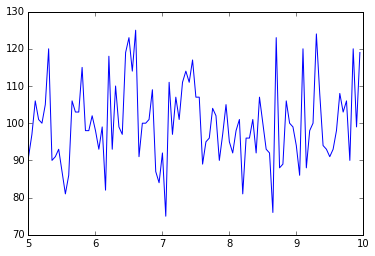

In [203]:
x=np.random.uniform(5,10,10000)
a = np.histogram(x, bins=100)[0]
b = np.histogram(x, bins=100)[1][:-1]
plt.plot(b,a)

## Typy danych

Szybkość NumPy'a wynika między innymi z bardziej restrykcyjnego zarządzania typami danych wewnątrz obiektów. Dlatego możliwe jest określenie, jakiego typu dane będą przechowywane wewnątrz tablicy. Kod został jednak tak pomyślany, że NumPy najczęściej sam 'wydedukuje', jakiego typu są wprowadzone dane.<br>
Wiadomo, że najczęściej tablice będą wypełnione liczbami zmiennoprzecinkowymi.

In [206]:
a = np.array([1,2,3])
a.dtype

dtype('int32')

In [207]:
b = np.array([1.,2,3])
b.dtype

dtype('float64')

In [208]:
c = np.ones(3)
c.dtype

dtype('float64')

In [210]:
d = np.array([1+1j,2,3]) #liczby złożone (składające się z części rzeczywistej i urojonej)
d.dtype

dtype('complex128')

In [211]:
e = np.array([True, False, False])
e.dtype

dtype('bool')

In [212]:
f = np.array(['asdf','asdfg','qwerty']) #tablica stringów o maksymalnej długości 6
f.dtype

dtype('S6')

<a href='#top' style='float: right; font-size: 13px;'>Do początku</a>  

## Slicing

Podobnie jak listy, tablice możemy dzielić na mniejsze części oraz wybierać z nich elementy według interesujących nas zasad.<br>
Zacznijmy od indeksowania, które jest podstawowym sposobem dotarcia do elementów w tablicy.

In [219]:
tablica = np.arange(1,17)
tablica

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [221]:
print (tablica[4])
print (tablica[-1])
print (tablica[::2])

5
16
[ 1  3  5  7  9 11 13 15]


Dodanie kolejnych liczb po przecinkach, pozwoli nam określić, jak ograniczyć tablicę ze względu na inne wymiary.<br>
Bardzo istotne jest zapamiętanie, że pierwszy parametr to <b>numer rzędu</b> a drugi to **numer kolumny**.<br>
Kolejne numery będą odwoływać się do następnych wymiarów tablicy.

In [224]:
tablica = tablica.reshape(4,4)
tablica

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [226]:
print tablica[2,2]
print tablica[1:,3]
print tablica[3:,::2]

11
[ 8 12 16]
[[13 15]]


Tablica zachowuje się w identyczny sposób jak lista także pod względem zmiany wartości wewnątrz jej komórek. Dokonuje się to poprzez znak <b>=</b>.

In [228]:
tablica[3,3]=17
tablica

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 17]])

Możemy połączyć obie te metody by podmienić więcej niż jeden element w tym samym momencie.

In [229]:
tablica[1:,2]=99
tablica

array([[ 1,  2,  3,  4],
       [ 5,  6, 99,  8],
       [ 9, 10, 99, 12],
       [13, 14, 99, 17]])

### Widoki i kopiowanie

Powyższe zabiegi są możliwe dlatego, że slicing tworzy tylko <b>podgląd</b> na oryginalną tablicę.<br>
Zobaczmy, jak wygląda manipulacja tablicami stworzonymi z innych talbic.

In [230]:
tablica2 = tablica[0:2,2:]
tablica2

array([[ 3,  4],
       [99,  8]])

In [231]:
tablica2[:,:] = -5
tablica2

array([[-5, -5],
       [-5, -5]])

In [232]:
tablica

array([[ 1,  2, -5, -5],
       [ 5,  6, -5, -5],
       [ 9, 10, 99, 12],
       [13, 14, 99, 17]])

Widzimy, że pomimo przypisania slicingu do nowej zmiennej, ta operacja nie tworzy nowej tablicy, wyłącznie podgląd. Dlatego modyfikacja tablica2 modyfikuje także tablica. Żeby uniknąć tego efektu trzeba wymusić kopiowanie za pomocą metody <b>.copy( )</b>.

In [234]:
tablica3 = tablica[2:,2:].copy()
tablica3

array([[99, 12],
       [99, 17]])

In [235]:
tablica3[:,:] = 100
tablica3

array([[100, 100],
       [100, 100]])

In [236]:
tablica

array([[ 1,  2, -5, -5],
       [ 5,  6, -5, -5],
       [ 9, 10, 99, 12],
       [13, 14, 99, 17]])

<a href='#top' style='float: right; font-size: 13px;'>Do początku</a>  

In [1]:
from IPython.core.display import HTML
from urllib.request import urlopen
HTML(urlopen("https://raw.githubusercontent.com/mkoculak/hello_world/nowa/ipython.css").read().decode("utf-8"))